# Example of multiple subject query.
Uses OO MSED. In this example beer bottles and and burgers.

In [1]:
from pathlib import Path
from sisap2023.utils.mirflickr import load_encodings, set_mf_images_path

data_root = Path("/Volumes/Data")

# set the location of the mirflickr images so they can be displayed
set_mf_images_path(data_root / "mf" / "images")

# load the dino2 image embeddings and the resnet19 softmax activations
data = load_encodings(data_root / "mf_dino2")
sm_data = load_encodings(data_root / "mf_resnet19_softmax")

In [2]:
from sisap2023.utils.distances import l1_norm, relu

data = relu(data)
data = l1_norm(data)

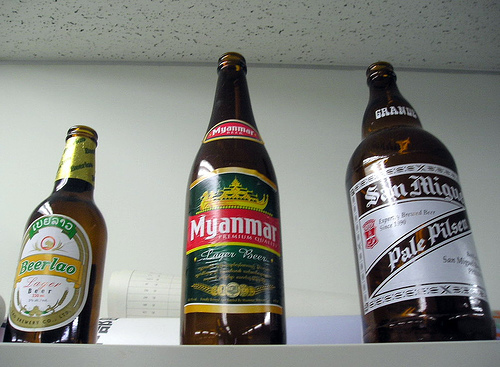

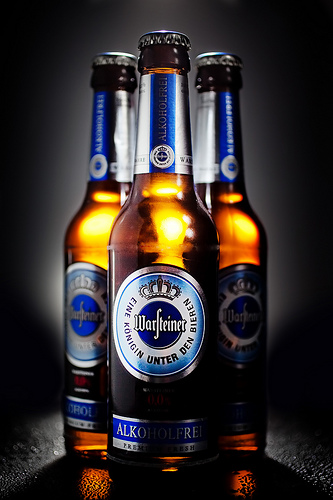

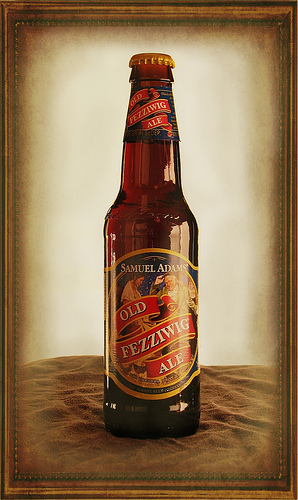

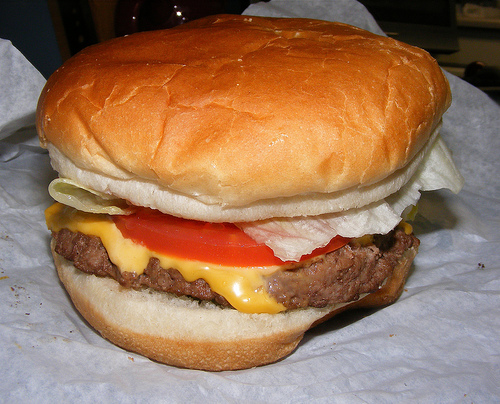

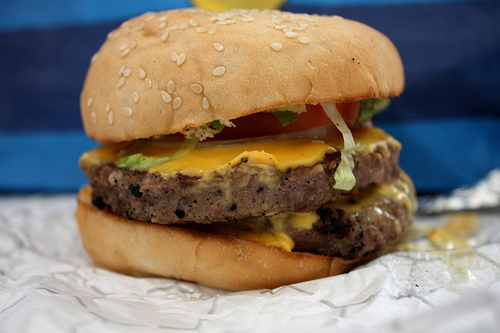

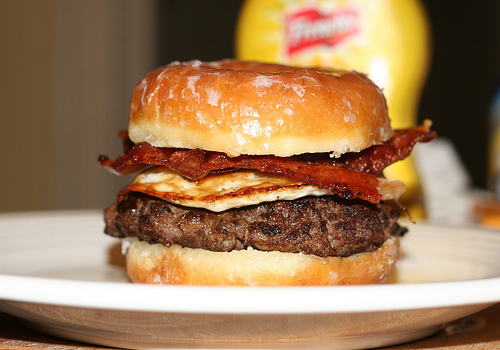

In [3]:
from sisap2023.utils.count_cats import get_best_cat_index
from sisap2023.utils.mirflickr import get_mf_image

# subtract 1 from the file numbers
cat1 = 440 # beer bottle
cat2 = 933 # cheeseburger

indexes_for_cat1 = get_best_cat_index(cat1, sm_data)
indexes_for_cat2 = get_best_cat_index(cat2, sm_data)

cat1_index1 = indexes_for_cat1[0]
cat1_index2 = indexes_for_cat1[1]   # bottles
cat1_index3 = indexes_for_cat1[2]

cat2_index1 = indexes_for_cat2[0]
cat2_index2 = indexes_for_cat2[1]   # glasses
cat2_index3 = indexes_for_cat2[2]

display(get_mf_image(cat1_index1))
display(get_mf_image(cat1_index2))
display(get_mf_image(cat1_index3))
display(get_mf_image(cat2_index1))
display(get_mf_image(cat2_index2))
display(get_mf_image(cat2_index3))

In [4]:
from sisap2023.metrics.msed_class import MSED
import numpy as np

base_data = np.vstack((data[cat1_index1],data[cat1_index2],data[cat1_index3],data[cat2_index1],data[cat2_index2],data[cat2_index3]))   

base = MSED(base_data)  # form the base simplex 

complexities = base.query(data)


In [5]:

complexities = complexities.flatten()   # <<< these are all matrices of matrices shouldn't be.
indices = np.argsort(complexities)      # lowest is first
top_100 = indices[0:100]


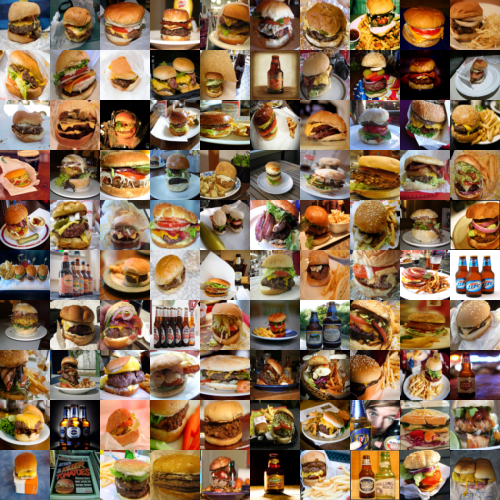

In [6]:
from sisap2023.utils.mirflickr import make_mf_image_grid

make_mf_image_grid(top_100,10,10,50,50)

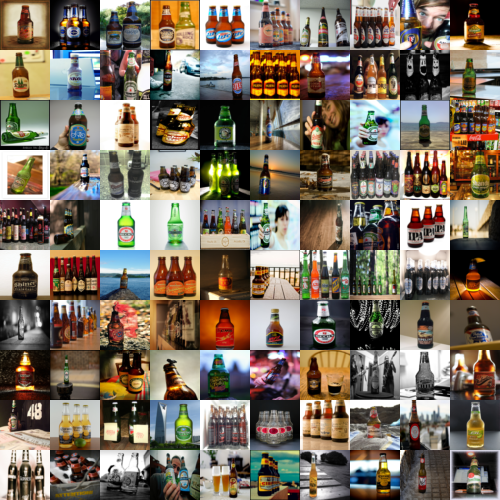

In [7]:
# now try just bottles

base_data = np.vstack((data[cat1_index1],data[cat1_index2],data[cat1_index3]) )  

base = MSED(base_data)  # form the base simplex 
complexities = base.query(data)
complexities = complexities.flatten()   # <<< these are all matrices of matrices shouldn't be.
indices = np.argsort(complexities)      # lowest is first
top_100 = indices[0:100]
make_mf_image_grid(top_100,10,10,50,50)

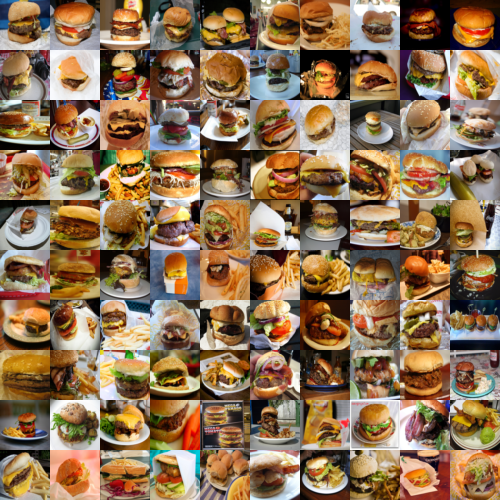

In [8]:
# now try just glasses

base_data = np.vstack((data[cat2_index1],data[cat2_index2],data[cat2_index3]) )  

base = MSED(base_data)  # form the base simplex 
complexities = base.query(data)
complexities = complexities.flatten()   # <<< these are all matrices of matrices shouldn't be.
indices = np.argsort(complexities)      # lowest is first
top_100 = indices[0:100]
make_mf_image_grid(top_100,10,10,50,50)